# Spin-Spin Hamiltonian Gate Fitting

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Spin-Spin Hamiltonian with Local Fourier Series Interaction

### Fit CNOT, Ideal

In [2]:
# Degree = 1

T = 1
U = tf.convert_to_tensor([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=tf.complex128)

channel_target = ChoiMapStatic(U, mode="unitary")
choi_target = channel_target.choi
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=1)
jump_operator = JumpOperator(4, trainable=False)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = jump_operator,
                                   gamma = 0.0)

channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200)
print(tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target)**2))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in tqdm(range(500)):
    with tf.GradientTape() as tape:
        tape.watch(channel_model.parameter_list)
        choi_model = channel_model.choi(T)
        loss = tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target) ** 2)

    print(loss)
    gradients = tape.gradient(loss, channel_model.parameter_list)
    optimizer.apply_gradients(zip(gradients, channel_model.parameter_list))

tf.Tensor(31.495004873045442, shape=(), dtype=float64)


  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(31.495004873045442, shape=(), dtype=float64)
tf.Tensor(31.379754961188574, shape=(), dtype=float64)
tf.Tensor(31.25357763411437, shape=(), dtype=float64)
tf.Tensor(31.11686574119708, shape=(), dtype=float64)
tf.Tensor(30.970040473628778, shape=(), dtype=float64)
tf.Tensor(30.81355613894672, shape=(), dtype=float64)


KeyboardInterrupt: 

In [7]:
# Degree = 2

T = 1
U = tf.convert_to_tensor([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=tf.complex128)

channel_target = ChoiMapStatic(U, mode="unitary")
choi_target = channel_target.choi
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model2 = SpinSpin(degree=2)
jump_operator = JumpOperator(4, trainable=False)

lindblad_model = LindbladGenerator(hamiltonian = H_model2, 
                                   jump_operator = jump_operator,
                                   gamma = 0.0)

channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200)
print(tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target)**2))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in tqdm(range(500)):
    with tf.GradientTape() as tape:
        tape.watch(channel_model.parameter_list)
        choi_model = channel_model.choi(T)
        loss = tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target) ** 2)

    print(loss)
    gradients = tape.gradient(loss, channel_model.parameter_list)
    optimizer.apply_gradients(zip(gradients, channel_model.parameter_list))

tf.Tensor(28.405977244987298, shape=(), dtype=float64)


  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(28.405977244987298, shape=(), dtype=float64)
tf.Tensor(28.17475690184245, shape=(), dtype=float64)
tf.Tensor(27.94526571892065, shape=(), dtype=float64)
tf.Tensor(27.715259782900418, shape=(), dtype=float64)
tf.Tensor(27.48211989793709, shape=(), dtype=float64)
tf.Tensor(27.245174947884298, shape=(), dtype=float64)
tf.Tensor(27.004293072415443, shape=(), dtype=float64)
tf.Tensor(26.75964351084975, shape=(), dtype=float64)
tf.Tensor(26.511462307549056, shape=(), dtype=float64)
tf.Tensor(26.259814046135276, shape=(), dtype=float64)
tf.Tensor(26.004428226852312, shape=(), dtype=float64)
tf.Tensor(25.744617412771696, shape=(), dtype=float64)
tf.Tensor(25.479316407944026, shape=(), dtype=float64)
tf.Tensor(25.20721379533093, shape=(), dtype=float64)
tf.Tensor(24.92689183100274, shape=(), dtype=float64)
tf.Tensor(24.63691674006548, shape=(), dtype=float64)
tf.Tensor(24.335902954418557, shape=(), dtype=float64)
tf.Tensor(24.022577719167074, shape=(), dtype=float64)
tf.Tensor(23.6958

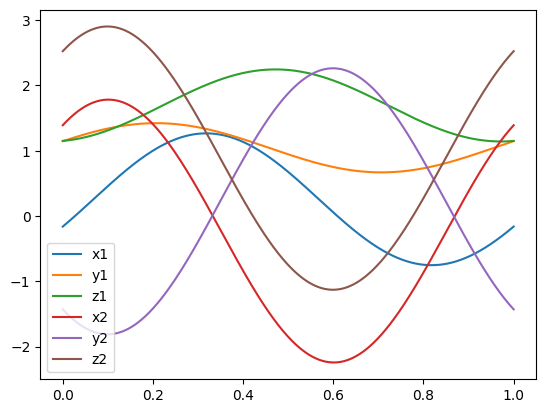

In [9]:
t, signal_list = H_model2.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()

In [10]:
# Degree = 2

T = 1
U = tf.convert_to_tensor([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=tf.complex128)

channel_target = ChoiMapStatic(U, mode="unitary")
choi_target = channel_target.choi
n = 2
d = 2**n

tf.random.set_seed(43)
np.random.seed(43)

H_model2 = SpinSpin(degree=2)
jump_operator = JumpOperator(4, trainable=False)

lindblad_model = LindbladGenerator(hamiltonian = H_model2, 
                                   jump_operator = jump_operator,
                                   gamma = 0.0)

channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200)
print(tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target)**2))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in tqdm(range(500)):
    with tf.GradientTape() as tape:
        tape.watch(channel_model.parameter_list)
        choi_model = channel_model.choi(T)
        loss = tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target) ** 2)

    print(loss)
    gradients = tape.gradient(loss, channel_model.parameter_list)
    optimizer.apply_gradients(zip(gradients, channel_model.parameter_list))

tf.Tensor(30.03405512087018, shape=(), dtype=float64)


  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(30.03405512087018, shape=(), dtype=float64)
tf.Tensor(29.831078464863502, shape=(), dtype=float64)
tf.Tensor(29.61466165668623, shape=(), dtype=float64)
tf.Tensor(29.383483172026423, shape=(), dtype=float64)
tf.Tensor(29.136422894115437, shape=(), dtype=float64)
tf.Tensor(28.872752768999533, shape=(), dtype=float64)
tf.Tensor(28.591476380497348, shape=(), dtype=float64)
tf.Tensor(28.291305303398236, shape=(), dtype=float64)
tf.Tensor(27.971086890933847, shape=(), dtype=float64)
tf.Tensor(27.629972146321474, shape=(), dtype=float64)
tf.Tensor(27.267304616550945, shape=(), dtype=float64)
tf.Tensor(26.882594502088153, shape=(), dtype=float64)
tf.Tensor(26.475552431355524, shape=(), dtype=float64)
tf.Tensor(26.046111177564363, shape=(), dtype=float64)
tf.Tensor(25.594440310915438, shape=(), dtype=float64)
tf.Tensor(25.1209408499274, shape=(), dtype=float64)
tf.Tensor(24.62627102963571, shape=(), dtype=float64)
tf.Tensor(24.111350914541426, shape=(), dtype=float64)
tf.Tensor(23.57

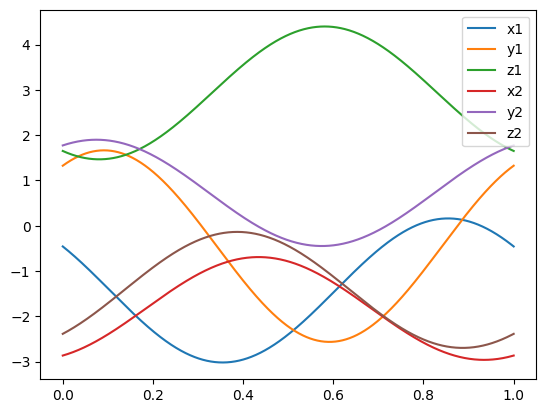

In [11]:
t, signal_list = H_model2.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()

### Haar Random Unitary

In [ ]:
# Degree = 1

T = 1
U = random_unitary(4, seed=42).data

channel_target = ChoiMapStatic(U, mode="unitary")
choi_target = channel_target.choi
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=1)
jump_operator = JumpOperator(4, trainable=False)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = jump_operator,
                                   gamma = 0.0)

channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200)
print(tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target)**2))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in tqdm(range(500)):
    with tf.GradientTape() as tape:
        tape.watch(channel_model.parameter_list)
        choi_model = channel_model.choi(T)
        loss = tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target) ** 2)

    print(loss)
    gradients = tape.gradient(loss, channel_model.parameter_list)
    optimizer.apply_gradients(zip(gradients, channel_model.parameter_list))

In [5]:
# Degree = 2

T = 1
U = random_unitary(4, seed=42).data

channel_target = ChoiMapStatic(U, mode="unitary")
choi_target = channel_target.choi
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=2)
lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4, trainable=False),
                                   gamma = 0.0)

channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200)
print(tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target)**2))

optimizer = tf.optimizers.Adam(learning_rate=0.01)
for i in tqdm(range(500)):
    with tf.GradientTape() as tape:
        tape.watch(channel_model.parameter_list)
        choi_model = channel_model.choi(T)
        loss = tf.math.reduce_sum(tf.abs(channel_model.choi(T) - choi_target) ** 2)

    print(loss)
    gradients = tape.gradient(loss, channel_model.parameter_list)
    optimizer.apply_gradients(zip(gradients, channel_model.parameter_list))

tf.Tensor(31.490951261682348, shape=(), dtype=float64)


  0%|          | 0/500 [00:00<?, ?it/s]

tf.Tensor(31.490951261682348, shape=(), dtype=float64)
tf.Tensor(31.39466010554042, shape=(), dtype=float64)
tf.Tensor(31.286757869801363, shape=(), dtype=float64)
tf.Tensor(31.166857145379936, shape=(), dtype=float64)
tf.Tensor(31.03487151037859, shape=(), dtype=float64)
tf.Tensor(30.890802306219598, shape=(), dtype=float64)
tf.Tensor(30.73464849506324, shape=(), dtype=float64)
tf.Tensor(30.5664180445659, shape=(), dtype=float64)
tf.Tensor(30.386203192862144, shape=(), dtype=float64)
tf.Tensor(30.19429020015734, shape=(), dtype=float64)
tf.Tensor(29.991217435147895, shape=(), dtype=float64)
tf.Tensor(29.777769594642614, shape=(), dtype=float64)
tf.Tensor(29.554941944959587, shape=(), dtype=float64)
tf.Tensor(29.3238959075046, shape=(), dtype=float64)
tf.Tensor(29.08589791039337, shape=(), dtype=float64)
tf.Tensor(28.842250049160818, shape=(), dtype=float64)
tf.Tensor(28.594273590546194, shape=(), dtype=float64)
tf.Tensor(28.343369679438368, shape=(), dtype=float64)
tf.Tensor(28.091072

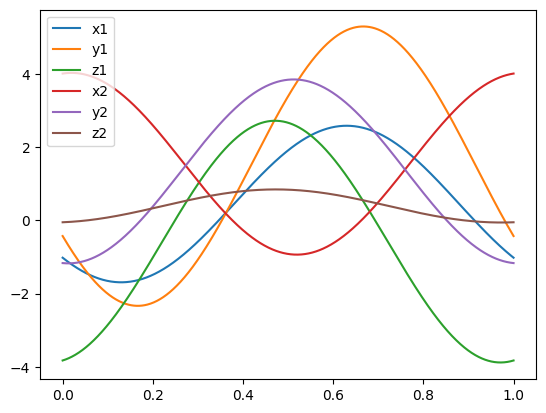

In [6]:
t, signal_list = H_model.generate_Fourier_series()

plt.plot(t, signal_list[0], label="x1")
plt.plot(t, signal_list[1], label="y1")
plt.plot(t, signal_list[2], label="z1")
plt.plot(t, signal_list[3], label="x2")
plt.plot(t, signal_list[4], label="y2")
plt.plot(t, signal_list[5], label="z2")
plt.legend()